In [181]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("../zippedData/tn.movie_budgets.csv.gz")
len(df)

5782

In [182]:
#removes commas, dollar signs and converts all numerical data to float
def string_to_float(string):
    return float(string.replace('$', '').replace(',',''))
df['worldwide_gross'] = df['worldwide_gross'].apply(lambda x: string_to_float(x))
df['production_budget'] = df['production_budget'].apply(lambda x: string_to_float(x))
df['domestic_gross'] = df['domestic_gross'].apply(lambda x: string_to_float(x))

#drops the first porno movie shown in theaters which made 175,500 times its budget
#Its both a massive outlier and presumably no longer possible in the industry microsoft is trying to break in to

df = df[df.movie != 'Deep Throat']

In [183]:
#creating various profit and roi columns, by subtracting budget from gross and dividing by budget

df['profit'] = df['worldwide_gross'] - df['production_budget'] 
df['domestic_profit'] = df['domestic_gross'] - df['production_budget']
df['has foriegn'] = df['worldwide_gross'] > 0
df['roi'] = (df['profit']/ df['production_budget'])*100
df['domestic_roi'] = (df['domestic_profit']/ df['production_budget']) * 100

#these function removes outliers from the data and are designed to be applicable to any df 

def get_iqr(df, col_name):
    hq = df[col_name].quantile(0.75) 
    median = df[col_name].quantile(0.5)
    lq = df[col_name].quantile(0.15)
    iqr = hq-lq
    return iqr, median

def is_outlier(x, iqr, median):
    if x > median + iqr*1.5:
        return True
    elif x < median - 1.5*iqr:
        return True
    else:
        return False

def find_outliers(df, column):
    """
    Returns a boolean series. True if outside IQR*1.5 range, False otherwise
    """
    IQR , median  = get_iqr(df, column)
    return df[column].apply(lambda x: is_outlier(x, IQR, median))

df['outlier_budget'] = find_outliers(df, 'production_budget' )

    
#categorized each movie by the size of its budget as either 'large', 'medium' or 'small', our groupings
#based on industry standards NOTE: these values are mostly arbitrary as different people may consider a
#$5 million not a small budget, theres no official definition. 


def categorize_production(x):
    m = int(x)
    k=''
    if m < 5000000:
        k = 'small'
    if 500000 < m < 10000000:
        k = 'medium'
    if m > 100000000:
        k = 'large'
    return k

df['budget_category'] = df['production_budget'].apply(lambda x: categorize_production(x))

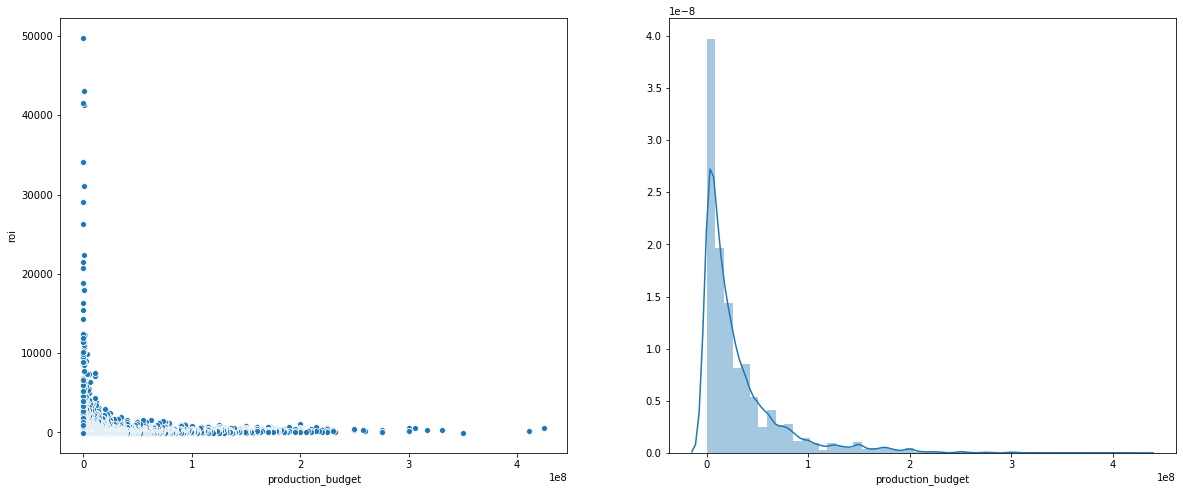

In [217]:
# fetching roi data for each category to use in future graphs

s_x = df[(df.budget_category == 'small')&(df.outlier_budget == False)]['roi']

m_x = df[(df.budget_category == 'medium')&(df.outlier_budget == False)]['roi']

l_x = df[(df.budget_category == 'large')&(df.outlier_budget == False)]['roi']

#creating a new column that returns True if a film lost money

df['lost_money'] = [x < 0 for x in df['roi']]

#plotting production budget vs roi and a distribution of roi
fig2, axes = plt.subplots(1,2, figsize = (20,8))
sns.scatterplot(df['production_budget'], df['roi'], ax= axes[0])
sns.distplot(df['production_budget'], ax= axes[1])
ax2.set_ylim(top = 1000, bottom = -200);

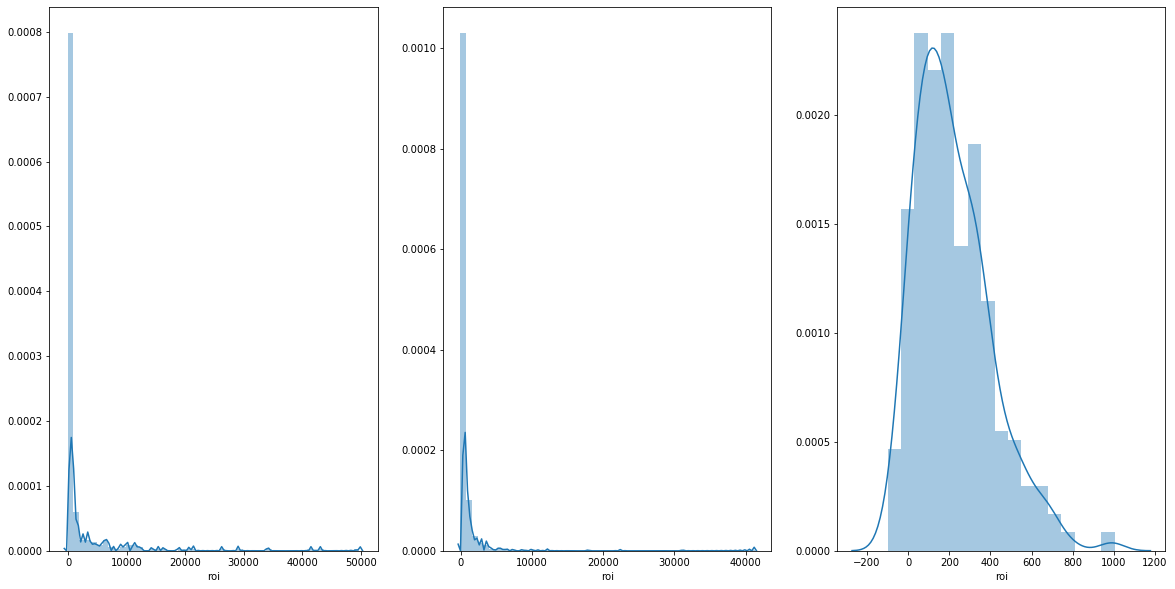

In [194]:
f, axes = plt.subplots(1,3, figsize=(20, 10), sharex=False)

sns.distplot(df[df.budget_category == 'small']['roi'], ax = axes[0])

sns.distplot(df[df.budget_category == 'medium']['roi'], ax = axes[1])

sns.distplot(df[df.budget_category == 'large']['roi'], ax = axes[2]);


In [219]:
len(df[(df.outlier_budget == True)&(df.lost_money == True)])

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,domestic_profit,has foriegn,roi,domestic_roi,outlier_budget,budget_category,lost_money
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,149762350.0,-200237650.0,-307237650.0,True,-57.210757,-87.782186,True,large,True
12,13,"Jul 2, 2013",The Lone Ranger,275000000.0,89302115.0,260002115.0,-14997885.0,-185697885.0,True,-5.453776,-67.526504,True,large,True
108,9,"Jun 22, 2007",Evan Almighty,175000000.0,100289690.0,174131329.0,-868671.0,-74710310.0,True,-0.496383,-42.691606,True,large,True
110,11,"May 12, 2017",King Arthur: Legend of the Sword,175000000.0,39175066.0,139630336.0,-35369664.0,-135824934.0,True,-20.211237,-77.614248,True,large,True
111,12,"Dec 25, 2013",47 Ronin,175000000.0,38362475.0,151716815.0,-23283185.0,-136637525.0,True,-13.304677,-78.078586,True,large,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,68,"Oct 23, 1998",Soldier,75000000.0,14623082.0,14623082.0,-60376918.0,-60376918.0,True,-80.502557,-80.502557,True,,True
668,69,"Jan 15, 1999",Virus,75000000.0,14010690.0,30626690.0,-44373310.0,-60989310.0,True,-59.164413,-81.319080,True,,True
669,70,"Feb 23, 2001",Monkeybone,75000000.0,5409517.0,5409517.0,-69590483.0,-69590483.0,True,-92.787311,-92.787311,True,,True
670,71,"Aug 30, 2019",PLAYMOBIL,75000000.0,0.0,0.0,-75000000.0,-75000000.0,False,-100.000000,-100.000000,True,,True


In [187]:
df.sort_values('roi')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,domestic_profit,has foriegn,roi,domestic_roi,outlier_budget,budget_category,lost_money
5712,13,"Dec 31, 2012",Hayride,60000.0,0.0,0.0,-60000.0,-60000.0,False,-100.000000,-100.000000,False,small,[True]
5753,54,"Dec 31, 2014",Dry Spell,22000.0,0.0,0.0,-22000.0,-22000.0,False,-100.000000,-100.000000,False,small,[True]
2754,55,"Mar 8, 2016",Out of the Inferno,19000000.0,0.0,0.0,-19000000.0,-19000000.0,False,-100.000000,-100.000000,False,,[True]
5318,19,"Feb 10, 2015",Fear Clinic,1000000.0,0.0,0.0,-1000000.0,-1000000.0,False,-100.000000,-100.000000,False,medium,[True]
5319,20,"Mar 10, 2015",The Pet,1000000.0,0.0,0.0,-1000000.0,-1000000.0,False,-100.000000,-100.000000,False,medium,[True]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5709,10,"May 7, 2004",Super Size Me,65000.0,11529368.0,22233808.0,22168808.0,11464368.0,True,34105.858462,17637.489231,False,small,[False]
5406,7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,248300000.0,247700000.0,139939099.0,True,41283.333333,23323.183167,False,medium,[False]
5679,80,"Jul 10, 2015",The Gallows,100000.0,22764410.0,41656474.0,41556474.0,22664410.0,True,41556.474000,22664.410000,False,small,[False]
5492,93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034.0,193733034.0,107468810.0,True,43051.785333,23881.957778,False,small,[False]


In [216]:
sum(df['lost_money'])

TypeError: unsupported operand type(s) for +: 'int' and 'list'

5781